In [10]:
from interpret import interpret
from querry import *
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from DataSet import DataSet

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
seed = 8888

In [13]:
# create a new DataSet object
dataset = DataSet()
dataset.get_data('../data/TE_survey_csv_repaired.csv')

dataset.clean()
dataset.drop(['Authors', 'DOI', 'Comments', 'Comments.1', 'Author of Unit Cell','Unit Cell DOI'])

# use extrapolate_400K to extrapolate more row data
dataset_2 = DataSet()
dataset_2.data = dataset.extrapolate_400K([])
dataset_2.get_info()

1450 rows and 4 columns.
Components are: 
Formula, Resist, Seebeck, T (K)


In [43]:
# make an array containing the atomic descriptors
array = [compound_short_descriptors(x) for x in dataset_2.df['Formula'].values]
ndf = pd.DataFrame.from_records(array)
ndf = ndf.join(dataset_2.df[['T (K)']])
ndf = ndf.fillna(0)
print(ndf) # looks good!

           0     1             2       3      4       5        6      7  \
0     1.0000  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
1     1.0000  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
2     1.0000  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
3     1.0000  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
4     0.9800  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
5     0.9800  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
6     0.9800  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
7     0.9800  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
8     0.9600  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
9     0.9600  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
10    0.9600  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
11    0.9600  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.00   17.0   
12    0.9400  16.0  3.400

In [85]:
X = ndf.values
Y = dataset_2.df[['Seebeck']].values

In [47]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=seed)

# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train_pn)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)
# tranform the testing set
X_test = X_train_scaler.transform(X_test_pn)


In [97]:
def medium_model():
    # assemble the structure
    model = Sequential()
    model.add(Dense(81, input_dim=81, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [57]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(seed)
# create the NN framework
estimator = KerasRegressor(build_fn=medium_model,
        epochs=400, batch_size=25000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=400, 
        batch_size=10000, verbose=0)
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 3305.80 and for validation is 11416.19


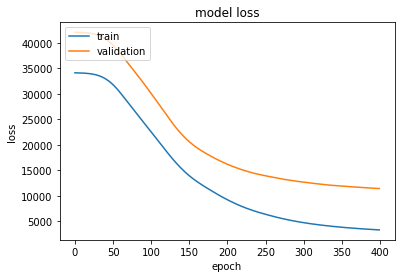

In [111]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [112]:
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

290/290 [==============================] - 0s 54us/step
test set mse is 13216.33


In [118]:
def test_data(compound, T):
    """Converts one sample to raw data for predicting thru ANN"""
    array = compound_short_descriptors(compound) + [T]
    array = X_train_scaler.transform(X_train_pn)
    return np.array(array)

In [ ]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),w
    Dense(1,activation='Softmax')
])